In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
url_googledoc = 'https://docs.google.com/spreadsheets/d/12tK5jH3c54cVdLw63KgYHrf7NFBPDbCk/edit#gid=870827323'
url_wikipedia = 'https://en.wikipedia.org/wiki/Demographics_of_Ukraine'

In [76]:
tables_googledoc = pd.read_html(url_googledoc, skiprows=1)

missing_charset = ['-', '_', ' ']

# Wyświetl pierwsze wiersze tabeli przy użyciu metody head

In [77]:
for index, table in enumerate(tables_googledoc):
    print(f'{table.head()}\n')

   1                        regions  2011  2012  2013  2015  2017  2019  2021  \
0  2  Autonomous Republic of Crimea  1.56  1.68  1.66     _     _     _     _   
1  3               Vinnytsia region  1.53  1.59  1.53   1.5  1.36   1.2  1.14   
2  4                   Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45   
3  5          Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03   
4  6                 Donetsk region  1.27  1.34  1.32     _     _     _     _   

   Unnamed: 9  ...  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0         NaN  ...          NaN          NaN          NaN          NaN   
1         NaN  ...          NaN          NaN          NaN          NaN   
2         NaN  ...          NaN          NaN          NaN          NaN   
3         NaN  ...          NaN          NaN          NaN          NaN   
4         NaN  ...          NaN          NaN          NaN          NaN   

   Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  

# Zdefiniuj typy wszystkich kolumn za pomocą dataframe.dtypes
# Zdefiniuj liczbę wierszy i kolumn w zbiorze danych (atrybut shape)
# Zastąp wartość "—" w tabeli wartością NaN

In [78]:
table.replace(missing_charset, np.nan, inplace=True)

table.drop(table.columns[0], axis=1, inplace=True)

table.dropna(axis=1, how='all', inplace=True)
table.dropna(axis=0, how='all', inplace=True)
num_rows, num_columns = table.shape

print(f'Rows: {num_rows}')
print(f'Columns: {num_columns}\n')
print(f'Data types:\n{table.dtypes}\n')
print(f'Table content:\n{table}\n')

Rows: 27
Columns: 8

Data types:
regions     object
2011        object
2012       float64
2013       float64
2015        object
2017        object
2019        object
2021        object
dtype: object

Table content:
                          regions  2011  2012  2013  2015  2017  2019  2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN   NaN
1                Vinnytsia region  1.53  1.59  1.53   1.5  1.36   1.2  1.14
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                  Donetsk region  1.27  1.34  1.32   NaN   NaN   NaN   NaN
5                  Fatigue region  1.65  1.71  1.68   1.6  1.42  1.23  1.14
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52   NaN
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09   NaN
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
9                     Kyi

# Oblicz proporcję pustych miejsc w każdej kolumnie

In [79]:
table = table.round(2)

missing_values_count = table.isnull().sum()

print(f'Missing values in each column:\n{missing_values_count}\n')

Missing values in each column:
regions     0
2011        1
2012        0
2013        0
2015        4
2017        4
2019        4
2021       11
dtype: int64



# Zmień typy kolumn nienumerycznych na numeryczne.

In [80]:
for col in table.columns[1:]:
    table[col] = pd.to_numeric(table[col], errors='coerce')

print(f'Data types:\n{table.dtypes}\n')

Data types:
regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object



# Zastąp brakujące dane w kolumnach średnimi wartościami tych kolumn

In [81]:
for col in table.columns[1:]:
    mean_value = table[col].mean()
    table.fillna({col: mean_value}, inplace=True)

table = table.round(2)

print(f'Table content:\n{table}\n')

Table content:
                          regions  2011  2012  2013  2015  2017  2019  2021
0   Autonomous Republic of Crimea  1.56  1.68  1.66  1.52  1.37  1.26  1.16
1                Vinnytsia region  1.53  1.59  1.53  1.50  1.36  1.20  1.14
2                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
3           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
4                  Donetsk region  1.27  1.34  1.32  1.52  1.37  1.26  1.16
5                  Fatigue region  1.65  1.71  1.68  1.60  1.42  1.23  1.14
6          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52  1.16
7               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09  1.16
8          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
9                     Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07
10              Kirovohrad region  1.50  1.61  1.57  1.49  1.30  1.12  1.04
11                 Luhansk region  1.27  1.33  1.30  1.52  1.37  1.26  1.

# Uzyskaj listę regionów, w których wskaźnik urodzeń w 2019 r.

In [82]:
if '2019' in table.columns:
    mean_birth_rate_2019 = table['2019'].mean()
    regions_above_average_2019 = table[table['2019'] > mean_birth_rate_2019][['regions', '2019']]
    
    print(f'Regions with birth rate in 2019 above average:\n{regions_above_average_2019.to_string(index=False)}')
else:
    print(f'Column "2019" does not exist in the table.')

Regions with birth rate in 2019 above average:
                      regions  2019
Autonomous Republic of Crimea  1.26
                 Volyn region  1.48
               Donetsk region  1.26
       Transcarpathian region  1.52
       Ivano-Frankivsk region  1.28
                  Kyiv region  2.15
               Luhansk region  1.26
                  Lviv region  1.26
                Odessa region  1.33
                 Rivne region  1.53
               Kherson region  1.27
           Khmelnytsky region  1.26
            Chernivtsi region  1.30
                 city of Kyiv  1.48
   Sevastopol ( City Council)  1.26


# Który region miał najwyższy wskaźnik urodzeń w 2014 roku?

In [83]:
if '2014' in table.columns:
    max_birth_rate_2014 = table['2014'].max()
    region_with_max_birth_rate_2014 = table[table['2014'] == max_birth_rate_2014][['regions', '2014']]
    
    print(f'Region with the highest birth rate in 2014:\n{region_with_max_birth_rate_2014.to_string(index=False)}')
else:
    print(f'Column "2014" does not exist in the table.')

Column "2014" does not exist in the table.


# Zbuduj wykres słupkowy wskaźnika urodzeń według regionów w 2019 r.

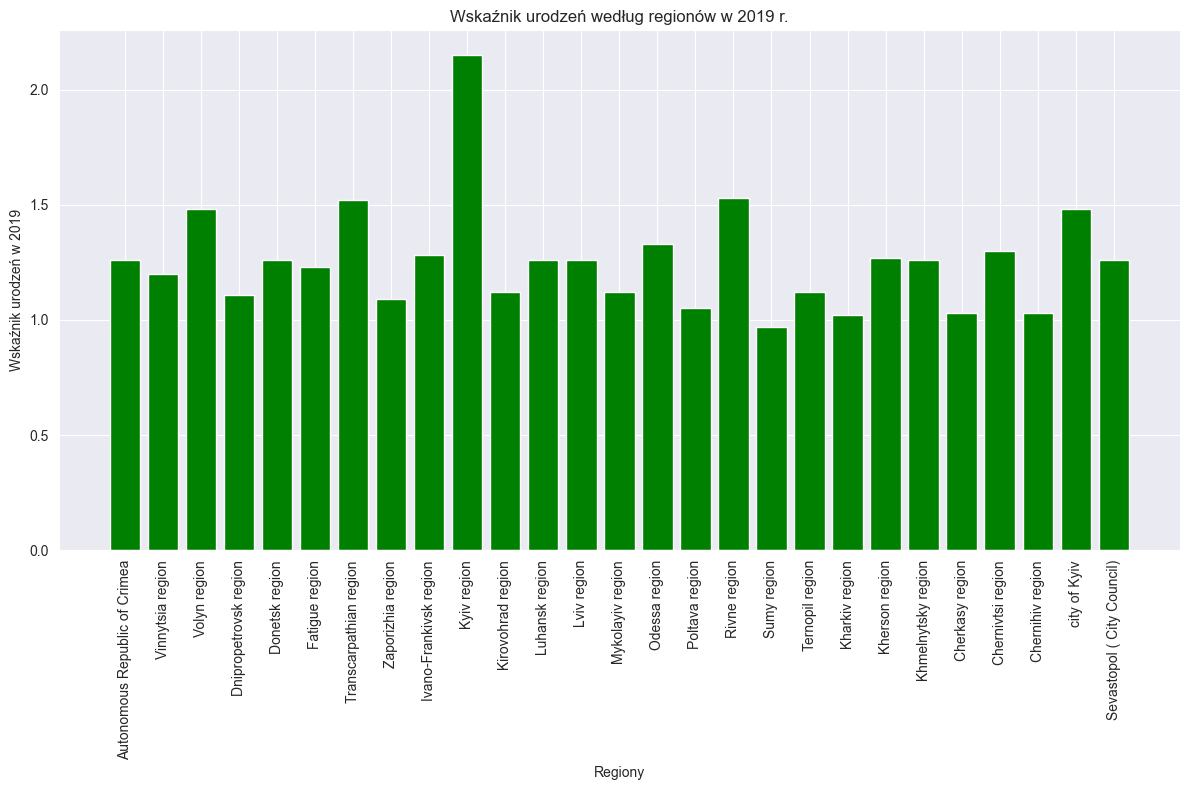

In [84]:
if '2019' in table.columns:
        plt.figure(figsize=(12, 8))
        plt.bar(table['regions'], table['2019'], color='green')
        plt.xlabel('Regiony')
        plt.ylabel('Wskaźnik urodzeń w 2019')
        plt.title('Wskaźnik urodzeń według regionów w 2019 r.')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
else:
    print(f'Column "2019" does not exist in the table.')

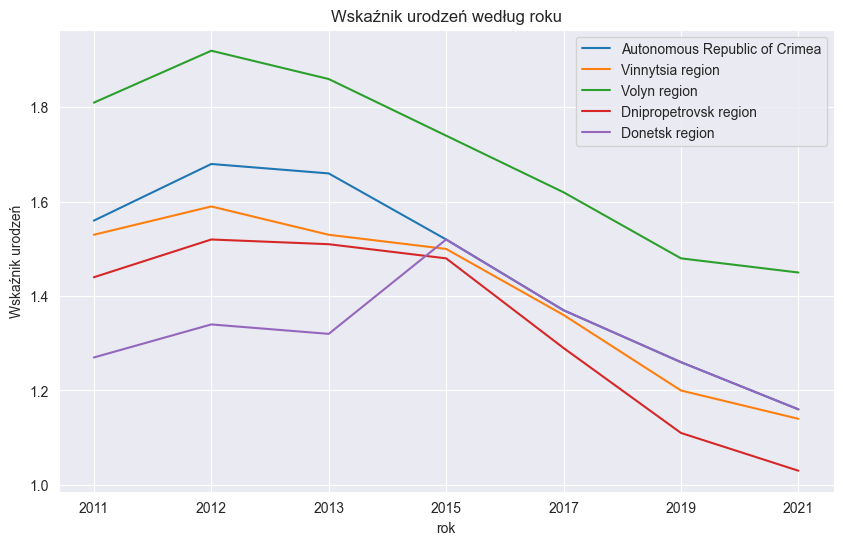

In [85]:
selected_regions = table['regions'].iloc[:5]

plt.figure(figsize=(10, 6))
for region in selected_regions:
    plt.plot(table.columns[1:], table[table['regions'] == region].iloc[0, 1:], label=region)
plt.title('Wskaźnik urodzeń według roku')
plt.xlabel('rok')
plt.ylabel('Wskaźnik urodzeń')
plt.legend()
plt.grid(True)
plt.show()

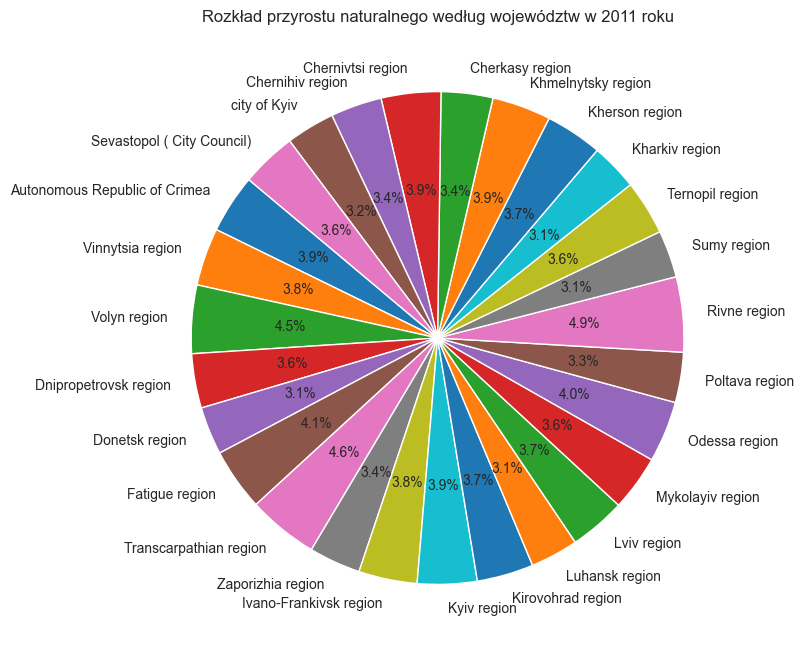

In [86]:
plt.figure(figsize=(8, 8))
plt.pie(table['2011'].dropna(), labels=table['regions'].dropna(), autopct='%1.1f%%', startangle=140)
plt.title('Rozkład przyrostu naturalnego według województw w 2011 roku')
plt.show()